### Clean corpus posts of each company

In [1]:
# Import cleaning module

from tokenization_bias import main_token

In [27]:
# Call the main_token function to preprocess and clean the text in the specified JSON file.
# The first argument is the name of the JSON file, and the second argument is the name of the column
# in the file that contains the text to be cleaned.

asesoftware_posts=main_token("posts.json","descripcion")
globant_posts=main_token("globant_linkedin.json","content")
accenture_posts=main_token("accenture_linkedin.json","content")

# Print the cleaned text for each company
print(asesoftware_posts)
print(globant_posts)
print(accenture_posts)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wdmoreno\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wdmoreno\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wdmoreno\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['lead trend 2022️artificial intelligence ️data analytics ️rpawhich one implement business', 'almost 2022 want share ai lead trend future year', 'demonstrate method aid mathematician discover new that_s simply amazing thing evolve field', 'limit rpa imagination programmer 🤖 ️can tell we rpa box application carlos castaño valencia diana cristhina pérez pérez fabian esteban peña castillo', 'introduce indoor garden control app ai enjoy fresh vegetable every day let grow 64 plant simultaneously green ai mashable', 'five way al contribute wildlifeconservation vast datum collection 📊 2 study protect specie 🐨 3 track wildlife pattern 📈 4 prediction endanger specie 🐼 5 classify animal specie', 'participant plan_semilla apprenticeship talk experience last month today want thank congratulate effort welcome team 👏 🏻 👏 🏻 👏 🏻thomas clarke rodríguez hernández sebastián_casas castillo leidy romero', 'today lcome new member team complete successfully plan_semilla 💫 plan_semilla apprenticeship start as

### NLP function

In [28]:
# Import model module

from model_bias import NLP_model

In [6]:

"""
Loads or trains a word2vec model based on a list of preprocessed text posts.

Args:
posts (list): List of preprocessed text posts.
model_name (str): Name to give to the trained word2vec model.

Returns:
model (gensim.models.Word2Vec): Trained word2vec model.
"""

ASW_model=NLP_model(asesoftware_posts,"biasASW_word2vec.model")
Globant_model=NLP_model(globant_posts,"biasGlobant_word2vec.model")
Accenture_model=NLP_model(accenture_posts,"biasAccenture_word2vec.model")

### Comparison of model and BIAS

In [7]:
# Import testing model

from test_bias import word_to_analyze_companies
from test_bias import distances_to_target_gender
from test_bias import distances_between_targets


In [8]:
word_list=['decision', 'special', 'enhance', 'speak', 'can', 'shape', 'idea', 'explain', 'author', 'invest', 'continue', 'wonder', '🎉', 'require', 'dream', 'analytic', 'reduce', 'core', '2022', 'evolution', 'include', 'old', 'evolve', 'highlight', 'favorite', 'combine', 'manage', 'difference', 'point', 'collection', 'online', 'congratulation', 'moment', 'international', 'key', 'never', 'smart', 'gender', 'face', 'equity', 'provide', 'medium', 'advantage', 'consider', 'thought', 'talent', 'really', 'society', 'foundation', 'view', 'without', 'us', 'vision', 'capability', 'ever', 'imagine', 'honor', 'excited', 'tell', 'happen']

for each in word_list:
    """
    Analyzes the given word and prints the companies that the word is associated with based on the provided models.

    Args:
        word (str): The word to be analyzed.
        asw_model (object): The ASW model object used for analysis.
        globant_model (object): The Globant model object used for analysis.
        accenture_model (object): The Accenture model object used for analysis.

    Returns:
        None
    """
    word_to_analyze_companies(each,ASW_model,Globant_model,Accenture_model)


----------------------------------------------------------------------------------------
Word:  decision
ASW:  [('industry', 0.6151000261306763), ('learn', 0.610041618347168), ('work', 0.6092746257781982), ('model', 0.6073532104492188), ('first', 0.5924954414367676)]
Globant:  [('dome', 0.22767843306064606), ('unique', 0.20591111481189728), ('🎥', 0.19338209927082062), ('🟢', 0.192180335521698), ('design', 0.18614152073860168)]
Accenture:  [('help', 0.2571909427642822), ('feel', 0.2507689595222473), ('one', 0.24949903786182404), ('service', 0.2363681048154831), ('people', 0.23225826025009155)]
----------------------------------------------------------------------------------------
Word:  special
ASW:  [('robot', 0.4920980930328369), ('start', 0.4874996244907379), ('thank', 0.4773994982242584), ('technology', 0.47712451219558716), ('one', 0.4768311381340027)]
Globant:  [('▸', 0.263932466506958), ('leader', 0.25465503334999084), ('world_cup', 0.23868268728256226), ('awareness', 0.230385676

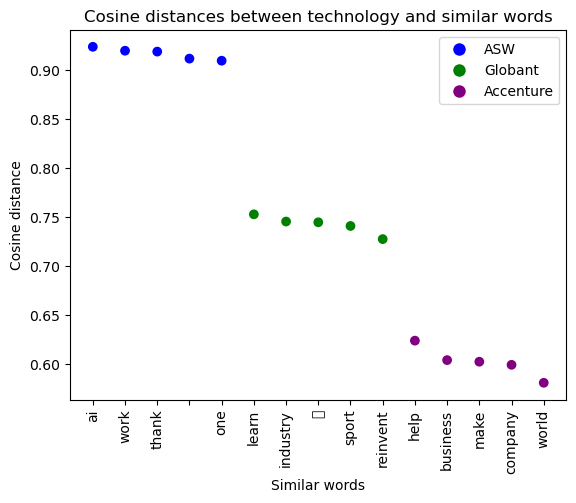

In [29]:
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Define the word to analyze
word="technology"

similarASW = ASW_model.wv.most_similar(word, topn=5)
similarGlobant = Globant_model.wv.most_similar(word, topn=5)
similarAccenture = Accenture_model.wv.most_similar(word, topn=5)

distancias_coseno = [similarASW[0][1], similarASW[1][1], similarASW[2][1], similarASW[3][1], similarASW[4][1],
                     similarGlobant[0][1], similarGlobant[1][1], similarGlobant[2][1], similarGlobant[3][1], similarGlobant[4][1],
                     similarAccenture[0][1], similarAccenture[1][1], similarAccenture[2][1], similarAccenture[3][1], similarAccenture[4][1]]

nombres_modelos = ["ASW"]*5 + ["Globant"]*5 + ["Accenture"]*5
nombres_words_similar = [s[0] for s in similarASW] + [s[0] for s in similarGlobant] + [s[0] for s in similarAccenture]

fig, ax = plt.subplots()
scatter = ax.scatter(nombres_words_similar, distancias_coseno, c=["blue"]*5 + ["green"]*5 + ["purple"]*5)

plt.xticks(rotation=90)
plt.title(f"Cosine distances between {word} and similar words")
plt.xlabel("Similar words")
plt.ylabel("Cosine distance")
legend_dict = {"ASW": "blue", "Globant": "green", "Accenture": "purple"}
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=k, markerfacecolor=v, markersize=10) for k, v in legend_dict.items()]
ax.legend(handles=legend_elements, loc='best')
plt.show()


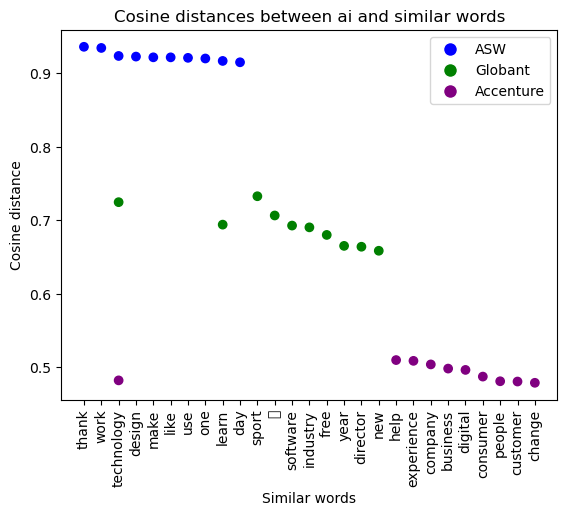

In [30]:
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

word="ai"
top=10

similarASW = ASW_model.wv.most_similar(word, topn=top)
similarGlobant = Globant_model.wv.most_similar(word, topn=top)
similarAccenture = Accenture_model.wv.most_similar(word, topn=top)

distancias_coseno = [sim[1] for sim in similarASW] + [sim[1] for sim in similarGlobant] + [sim[1] for sim in similarAccenture]

nombres_words_similar = [s[0] for s in similarASW] + [s[0] for s in similarGlobant] + [s[0] for s in similarAccenture]

fig, ax = plt.subplots()
scatter = ax.scatter(nombres_words_similar, distancias_coseno, c=["blue"]*top + ["green"]*top + ["purple"]*top)

plt.xticks(rotation=90)
plt.title(f"Cosine distances between {word} and similar words")
plt.xlabel("Similar words")
plt.ylabel("Cosine distance")
legend_dict = {"ASW": "blue", "Globant": "green", "Accenture": "purple"}
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=k, markerfacecolor=v, markersize=10) for k, v in legend_dict.items()]
ax.legend(handles=legend_elements, loc='best')
plt.show()


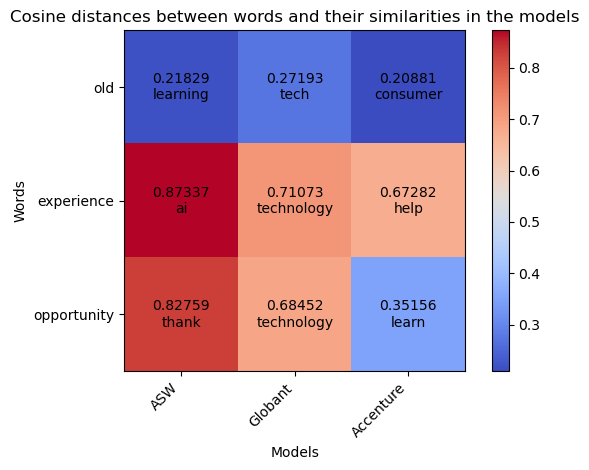

In [31]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

words = ['old', "experience", 'opportunity']

ASW_similar = [ASW_model.wv.most_similar(p, topn=1) for p in words]
ASW_distances = np.array([[s[1] for s in sim] for sim in ASW_similar])
ASW_words = np.array([[s[0] for s in sim] for sim in ASW_similar])

Globant_similar = [Globant_model.wv.most_similar(p, topn=1) for p in words]
Globant_distances = np.array([[s[1] for s in sim] for sim in Globant_similar])
Globant_words = np.array([[s[0] for s in sim] for sim in Globant_similar])

Accenture_similar = [Accenture_model.wv.most_similar(p, topn=1) for p in words]
Accenture_distances = np.array([[s[1] for s in sim] for sim in Accenture_similar])
Accenture_words = np.array([[s[0] for s in sim] for sim in Accenture_similar])

distances_coseno = np.concatenate((ASW_distances, Globant_distances, Accenture_distances), axis=1)
words_similar = np.concatenate((ASW_words, Globant_words, Accenture_words), axis=1)

fig, ax = plt.subplots()
im = ax.imshow(distances_coseno, cmap="coolwarm")

ax.set_xticks(np.arange(len(words)))
ax.set_yticks(np.arange(len(words)))
ax.set_xticklabels(["ASW"] + ["Globant"] + ["Accenture"])
ax.set_yticklabels(words)

plt.xticks(rotation=45, ha="right")

for i in range(len(words)):
    for j in range(len(words)):
        text = ax.text(j, i, "{:.5f}\n{}".format(distances_coseno[i, j], words_similar[i, j]),
                       ha="center", va="center", color="black")

plt.title("Cosine distances between words and their similarities in the models")
plt.xlabel("Models")
plt.ylabel("Words")

cbar = ax.figure.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()



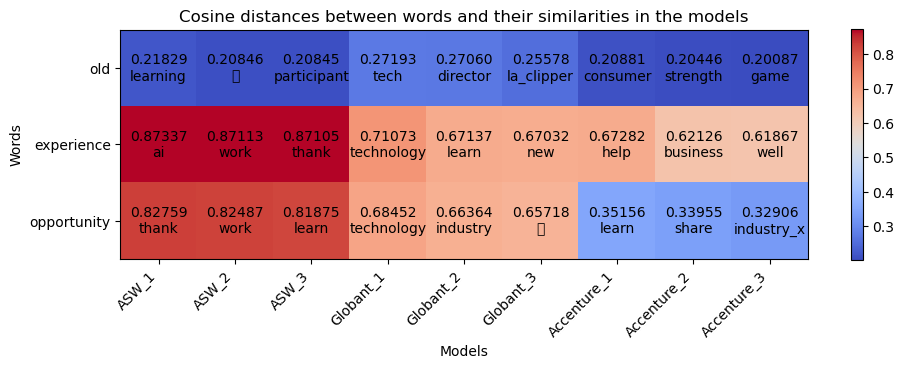

In [32]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

words = ['old', "experience", 'opportunity']

def obtener_similar(modelo, words, topn=3):
    similar = [modelo.wv.most_similar(p, topn=topn) for p in words]
    distances = np.array([[s[1] for s in sim] for sim in similar])
    words_similar = np.array([[s[0] for s in sim] for sim in similar])
    return distances, words_similar

ASW_distances, ASW_words = obtener_similar(ASW_model, words)
Globant_distances, Globant_words = obtener_similar(Globant_model, words)
Accenture_distances, Accenture_words = obtener_similar(Accenture_model, words)

distances_coseno = np.concatenate((ASW_distances, Globant_distances, Accenture_distances), axis=1)
words_similar = np.concatenate((ASW_words, Globant_words, Accenture_words), axis=1)

fig, ax = plt.subplots(figsize=(10, 8), dpi=100)
im = ax.imshow(distances_coseno, cmap="coolwarm")

ax.set_xticks(np.arange(len(words) * 3))
ax.set_yticks(np.arange(len(words)))
ax.set_xticklabels(["ASW_1", "ASW_2", "ASW_3", "Globant_1", "Globant_2", "Globant_3", "Accenture_1", "Accenture_2", "Accenture_3"])
ax.set_yticklabels(words)

plt.xticks(rotation=45, ha="right")

for i in range(len(words)):
    for j in range(len(words) * 3):
        text = ax.text(j, i, "{:.5f}\n{}".format(distances_coseno[i, j], words_similar[i, j]),
                       ha="center", va="center", color="black")

plt.title("Cosine distances between words and their similarities in the models")
plt.xlabel("Models")
plt.ylabel("Words")
cbar = fig.colorbar(im, shrink=0.3)
plt.tight_layout()
plt.show()


In [33]:
word_to_analyze_companies("woman",ASW_model,Globant_model,Accenture_model)

----------------------------------------------------------------------------------------
Word:  woman
ASW:  [('design', 0.8212602138519287), ('thank', 0.8097218871116638), ('technology', 0.809087872505188), ('ai', 0.8087992072105408), ('learn', 0.8086612820625305)]
Globant:  [('technology', 0.6557803153991699), ('learn', 0.6413915157318115), ('free', 0.6339490413665771), ('sport', 0.633415162563324), ('software', 0.624383270740509)]
Accenture:  [('see', 0.48058614134788513), ('people', 0.47990819811820984), ('company', 0.4747418761253357), ('digital', 0.468560129404068), ('global', 0.46746596693992615)]


In [34]:
distances_to_target_gender("experience", ASW_model, Globant_model, Accenture_model)
distances_to_target_gender("old", ASW_model, Globant_model, Accenture_model)
distances_to_target_gender("intelligence", ASW_model, Globant_model, Accenture_model)
distances_to_target_gender("opportunity", ASW_model, Globant_model, Accenture_model)
distances_to_target_gender("social", ASW_model, Globant_model, Accenture_model)
distances_to_target_gender("listen", ASW_model, Globant_model, Accenture_model)



 Word: experience

Distances 'woman' with experience:
ASW: 0.2483, Globant: 0.4131, Accenture: 0.5971
Distances with 'man' with experience :
ASW: 0.9297, Globant: 0.9131, Accenture: 0.9573

 Word: old

Distances 'woman' with old:
ASW: 0.8889, Globant: 0.8010, Accenture: 0.8833
Distances with 'man' with old :
ASW: 1.0147, Globant: 0.8983, Accenture: 0.9562

 Word: intelligence

Distances 'woman' with intelligence:
ASW: 0.7230, Globant: 0.5397, Accenture: 0.7188
Distances with 'man' with intelligence :
ASW: 1.0312, Globant: 1.0218, Accenture: 0.9185

 Word: opportunity

Distances 'woman' with opportunity:
ASW: 0.2865, Globant: 0.4532, Accenture: 0.8189
Distances with 'man' with opportunity :
ASW: 0.9714, Globant: 0.9031, Accenture: 1.0551

 Word: social

Distances 'woman' with social:
ASW: 0.5178, Globant: 0.7649, Accenture: 0.6303
Distances with 'man' with social :
ASW: 1.0105, Globant: 0.8942, Accenture: 0.8986

 Word: listen

Distances 'woman' with listen:
ASW: 0.7980, Globant: 0.541

In [35]:
distances_between_targets("opportunity", "experience", ASW_model, Globant_model, Accenture_model)
distances_between_targets("opportunity", "old", ASW_model, Globant_model, Accenture_model)
distances_between_targets("career", "grow", ASW_model, Globant_model, Accenture_model)
distances_between_targets("ai", "smart", ASW_model, Globant_model, Accenture_model)
distances_between_targets("team", "technology", ASW_model, Globant_model, Accenture_model)
distances_between_targets("equity", "career", ASW_model, Globant_model, Accenture_model)
distances_between_targets("equity", "gender", ASW_model, Globant_model, Accenture_model)
distances_between_targets("culture", "technology", ASW_model, Globant_model, Accenture_model)



 Distances opportunity with experience:

ASW: 0.2298, Globant: 0.4075, Accenture: 0.7022

 Distances opportunity with old:

ASW: 0.8916, Globant: 0.7957, Accenture: 1.0075

 Distances career with grow:

ASW: 0.9147, Globant: 0.8515, Accenture: 0.6876

 Distances ai with smart:

ASW: 0.8076, Globant: 0.7015, Accenture: 0.9131

 Distances team with technology:

ASW: 0.1148, Globant: 0.3945, Accenture: 0.5436

 Distances equity with career:

ASW: 0.9979, Globant: 0.9348, Accenture: 0.8930

 Distances equity with gender:

ASW: 0.8090, Globant: 1.0317, Accenture: 1.0167

 Distances culture with technology:

ASW: 0.5528, Globant: 0.6056, Accenture: 0.7403


In [36]:

ASW_common = ASW_model.wv.index_to_key
Globant_common = Globant_model.wv.index_to_key
Accenture_common = Accenture_model.wv.index_to_key

common_words = set(ASW_common) & set(Globant_common) & set(Accenture_common)

print("ASW common words:", ASW_common)
print("Globant common words:", Globant_common)
print("Accenture common words:", Accenture_common)
print("Common words across all 3 models:", common_words)


ASW common words: ['ai', 'work', 'thank', 'use', 'want', 'learn', 'design', 'technology', 'we', 'team', 'datum', 'year', 'start', 'new', 'make', 'business', 'human', 'create', '️', 'think', 'machine', 'help', 'day', 'quantum', 'one', 'robot', 'experience', 'love', 'write', 'model', 'solution', 'like', 'today', 'quantum_computing', 'know', 'good', 'could', 'understand', 'artificial_intelligence', 'article', 'rpa', 'data', 'lab', 'time', 'course', 'talk', 'need', 'company', 'apply', '🖤', 'user', 'people', 'process', 'first', 'asesoftware', 'information', 'way', 'read', 'improve', 'industry', 'want_know', '💪', 'job', 'video', 'two', 'enjoy', 'get', 'build', 'well', 'class', 'last', 'different', 'let', 'check', 'share', 'world', 'change', 'knowledge', 'iván_caballero', 'happy', 'come', 'application', 'designer', 'contact_we', 'holistic_design', 'challenge', '👏', 'together', 'science', 'fact', 'daily', 'take', 'automation', 'become', 'beten', 'feel', 'project', 'al', 'next', 'ai_designer', 

In [17]:
from collections import defaultdict

ASW_common = ASW_model.wv.index_to_key
Globant_common = Globant_model.wv.index_to_key
Accenture_common = Accenture_model.wv.index_to_key

common_words = set(ASW_common) & set(Globant_common) & set(Accenture_common)

freq_dict = defaultdict(int)
for word in common_words:
    freq_dict[word] += 1

sorted_words = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)
top_words = [w[0] for w in sorted_words]

print("Top common words:", top_words)

Top common words: ['solution', 'offer', 'start', 'full', 'congratulation', 'health', 'year', 'lead', 'include', 'watch', 'intelligence', 'design', 'free', '🙌', 'use', 'every', 'industry', 'first', '🎉', 'result', 'show', 'also', 'ready', 'know', 'thank', 'today', 'favorite', 'art', 'analytic', 'listen', 'meet', 'ai', 'challenge', 'build', 'ever', 'amazing', 'future', 'community', 'explain', 'feel', 'hear', 'career', 'research', 'manage', 'world', 'face', 'new', 'online', 'innovation', 'grow', 'partner', 'discover', 'talk', 'decision', 'designer', 'tool', 'team', 'inspire', 'company', 'never', 'place', '️', 'we', 'tell', 'sport', 'let', 'technology', 'us', 'medium', 'approach', 'enhance', 'much', 'even', 'business', 'celebrate', '2022', 'unique', 'bring', 'stay', 'really', 'society', 'get', 'professional', 'customer', 'everyone', 's', 'help', 'explore', 'can', 'difference', 'insight', 'program', 'give', 'expert', 'role', 'shape', 'evolution', '👏', 'science', 'happen', 'provide', 'make', 

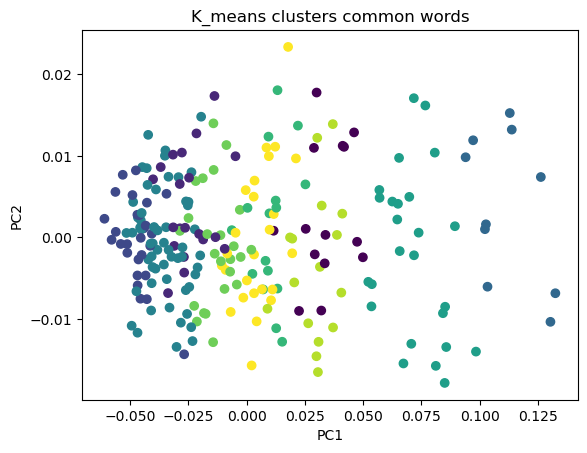

In [18]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

common_word_vectors = []
for word in top_words:
    common_word_vectors.append(
        ASW_model.wv.get_vector(word) + 
        Globant_model.wv.get_vector(word) + 
        Accenture_model.wv.get_vector(word)
    )
    
pca = PCA(n_components=2)
common_word_vectors_pca = pca.fit_transform(common_word_vectors)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(common_word_vectors)

plt.scatter(common_word_vectors_pca[:, 0], common_word_vectors_pca[:, 1], c=kmeans.labels_)
plt.title("K_means clusters common words")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

cluster_counts = defaultdict(int)
for i in range(len(top_words)):
    cluster_counts[kmeans.labels_[i]] += 1


In [19]:
words_in_clusters = defaultdict(list)
for i, word in enumerate(top_words):
    words_in_clusters[kmeans.labels_[i]].append(word)
    
most_common_clusters = sorted(words_in_clusters.items(), key=lambda x: len(x[1]), reverse=True)

for cluster, words in most_common_clusters:
    print(f"Cluster {cluster}: {words}")


Cluster 4: ['offer', 'health', 'include', '🙌', 'favorite', 'art', 'listen', 'meet', 'community', 'career', 'manage', 'grow', 'decision', 'never', 'tell', 'us', 'medium', 'enhance', '2022', 'unique', 'stay', 'really', 's', 'can', 'difference', 'give', 'role', 'evolution', 'foundation', 'consider', 'speaker', '2023', 'gender', 'key', 'core', 'advantage', 'play', 'without', 'say', 'what', 'moment', 'recognize', 'capability', 'boost', 'field', 'wonder', 'international', 'highlight', 'view', 'big', 'possible', 'tune', 'special', 'equity', 'evolve', 'smart', 'must', 'combine']
Cluster 2: ['congratulation', '🎉', 'analytic', 'explain', 'society', 'program', 'shape', 'happen', 'provide', 'reach', 'honor', 'excited', 'old', 'idea', 'invest', 'dream', 'continue', 'thought', 'require', 'imagine', 'vision', 'reduce', 'talent', 'point', 'author', 'speak', 'collection']
Cluster 5: ['start', 'design', 'use', 'build', 'world', 'new', 'team', 'company', '️', 'we', 'get', 'create', 'one', 'good', 'way', 

### Unique data ASW

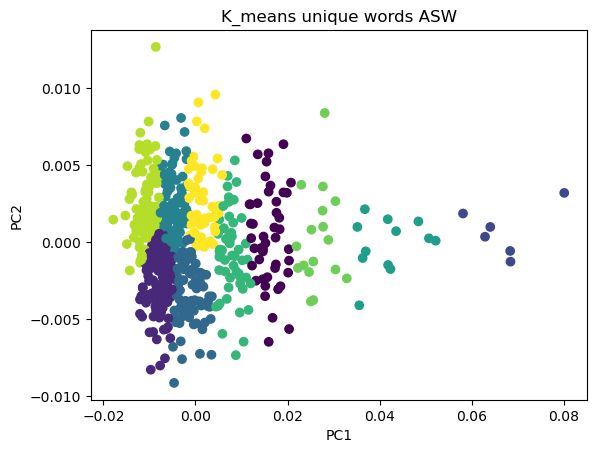

In [39]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

ASW_common = ASW_model.wv.index_to_key
Globant_common = Globant_model.wv.index_to_key
Accenture_common = Accenture_model.wv.index_to_key

ASW_unique = set(ASW_common) - set(Globant_common) - set(Accenture_common)
ASW_vectors = [ASW_model.wv.get_vector(word) for word in ASW_unique]
unique_word_vectors = ASW_vectors

pca = PCA(n_components=2)
unique_word_vectors_pca = pca.fit_transform(unique_word_vectors)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(unique_word_vectors_pca)

plt.scatter(unique_word_vectors_pca[:, 0], unique_word_vectors_pca[:, 1], c=kmeans.labels_)
plt.title("K_means unique words ASW")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

labels = defaultdict(str)
for i, word in enumerate(ASW_unique):
    labels[word] = "ASW"

In [40]:
word_labels = kmeans.labels_

cluster_words = defaultdict(list)
for i, word in enumerate(ASW_unique):
    cluster_words[word_labels[i]].append(word)

for cluster_label, words in cluster_words.items():
    print("Cluster ", cluster_label)
    print(words)


Cluster  6
['context', 'python', 'lot', 'read_last', '👨', 'avoid', 'maría', '3', 'friendship', '🔬', '⬇_️', 'engineering', 'interesting', 'dall', 'specific', 'night', 'photoshop', 'collect', 'comment', 'sebastián', '🧑', 'defeat', '️have', 'battle', '2and', 'word', 'trust', 'nlp', '🙌_🏼', 'physicist', 'darkness', 'relevant', 'touch', 'diffusion', 'velásquez', 'able', 'sara', 'syrian', 'data_engineer', 'stable', 'colombia', '🏼', 'machine_🦾', 'sure', 'character', 'hand', 'emotion', 'communityequinox', 'seek', 'start_career', '2', '🔥', 'feijóo']
Cluster  1
['increasingly', 'empathy', 'garavito', 'aidata', 'andré', 'oxford', 'he', 'highincome', 'computing', 'golf', 'rodríguez', 'broad', 'technique', 'sale', 'equinox', 'appear', 'familiarize', '️quantum', 'trustworthy', 'establishment', 'nano', 'specify', 'contraception', '️more', 'send', 'entirely', 'paste', 'valley', 'nowadays', 'volunteer', 'umbrella', '🍫', 'yulisa', 'small', 'accurately', 'have', 'shy', 'qubit', 'war', '20', 'grateful', '️

### Unique data Globant

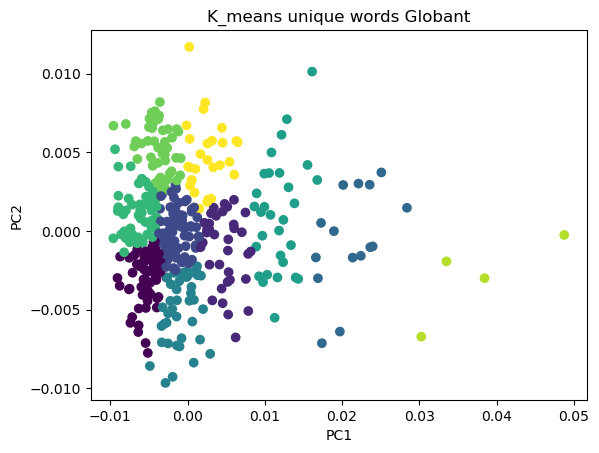

In [41]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

ASW_common = ASW_model.wv.index_to_key
Globant_common = Globant_model.wv.index_to_key
Accenture_common = Accenture_model.wv.index_to_key

Globant_unique = set(Globant_common) - set(ASW_common) - set(Accenture_common)
Globant_vectors = [Globant_model.wv.get_vector(word) for word in Globant_unique]
unique_word_vectors = Globant_vectors

pca = PCA(n_components=2)
unique_word_vectors_pca = pca.fit_transform(unique_word_vectors)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(unique_word_vectors_pca)

plt.scatter(unique_word_vectors_pca[:, 0], unique_word_vectors_pca[:, 1], c=kmeans.labels_)
plt.title("K_means unique words Globant")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

labels = defaultdict(str)
for i, word in enumerate(Globant_unique):
    labels[word] = "Globant"

In [42]:
word_labels = kmeans.labels_
cluster_words = defaultdict(list)
for i, word in enumerate(Globant_unique):
    cluster_words[word_labels[i]].append(word)
for cluster_label, words in cluster_words.items():
    print("Cluster ", cluster_label)
    print(words)

Cluster  5
['bozoma', 'edition', 'patricia', 'refik', 'mayo', 'arianna', 'cofounder', 'engage', 'interview', 'karlie_kloss', '🗓', 'que', 'huffington', 'bob_iger', 'la_clipper', '🇪', 'tristan_harris', 'diego_tartara', 'pomie', 'eliana', 'argentina', 'world_cup', 'fifa_world', 'cup', 'award', 'woman_build', 'roberto_carlos', '💚', 'glober', '➡']
Cluster  0
['laliga', '18', 'learner', 'meeting', 'nosso', 'marzo', 'syndrome', 'critical', 'coaching', 'unlimited', '🤔', 'actionable', 'consultancy', '🇹', 'atix', 'association', 'enter', 'trip', 'criar', 'mercedes', 'uncover', 'center', 'daytoday', 'organizational', 'announcement', '🌿', '🤛', 'impostor', 'paradigm', 'fácil', 'udemy', 'technologist', 'pujals', 'forrester', 'guess', 'newsletter', 'calendar', 'boundary', 'scaloneta', 'elena', 'phase', '⚡', 'unleash', 'testing', 'novembro', 'andrea', '🇽', 'qa', 'resume', 'region', 'macri', 'linguagem', 'demand', 'expertise', 'kill', 'several', 'disruptor', 'biomechanical', '🤜', 'hack', 'globant', 'fut

### Unique data Accenture

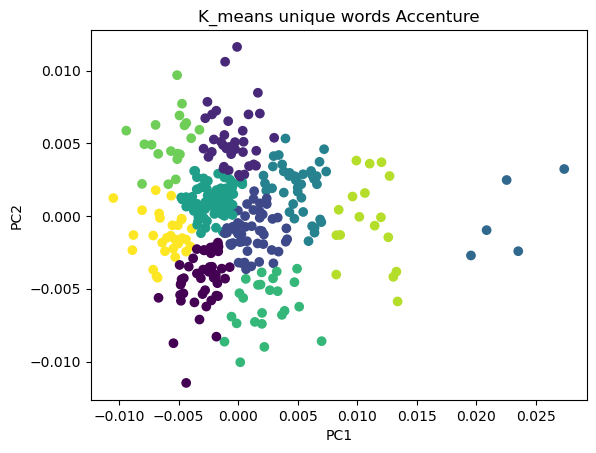

In [43]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

ASW_common = ASW_model.wv.index_to_key
Globant_common = Globant_model.wv.index_to_key
Accenture_common = Accenture_model.wv.index_to_key

Accenture_unique = set(Accenture_common) - set(ASW_common) - set(Globant_common)
Accenture_vectors = [Accenture_model.wv.get_vector(word) for word in Accenture_unique]

unique_word_vectors = Accenture_vectors

pca = PCA(n_components=2)
unique_word_vectors_pca = pca.fit_transform(unique_word_vectors)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(unique_word_vectors_pca)

plt.scatter(unique_word_vectors_pca[:, 0], unique_word_vectors_pca[:, 1], c=kmeans.labels_)
plt.title("K_means unique words Accenture")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

labels = defaultdict(str)
for i, word in enumerate(Accenture_unique):
    labels[word] = "Accenture"

In [44]:
word_labels = kmeans.labels_
cluster_words = defaultdict(list)
for i, word in enumerate(Accenture_unique):
    cluster_words[word_labels[i]].append(word)
for cluster_label, words in cluster_words.items():
    print("Cluster ", cluster_label)
    print(words)

Cluster  5
['embed', 'davos', 'revel', 'major', 'auto', 'multidimensional', 'achiever', '🎧', 'massive', 'helping', 'communication', 'multicultural', 'location', '1', 'host', 'wrap', 'whole', 'disruption', 'toward', 'citizen', 'edwin', 'automated', 'predictive', 'billion', 'essential', 'internal', 'speed', 'index', 'athlete', 'combination', 'teresa', 'motivational', 'connectivitybase', 'illuminate', 'barcelona', 'guan', 'east', 'purple', 'differentiation', 'mark', 'peer', 'broaden', 'et', 'jack', 'differently', 'habit', 'radically', 'rsvp', 'responsibly', 'dr', 'which', 'fortune', 'holocaust', 'majekodunmi', 'cocacola', 'operating', 'nazi', 'flight', 'tedx', 'address', 'airline', '😎', 'emission', 'wing', '➕', 'chart', 'transparency', 'belong', 'backstage', 'estimate', 'planet', 'seamlessly', 'pursue', 'sign']
Cluster  0
['carefully', 'sleep', 'importantly', 'kapoor', 'strategist', 'capture', 'retain', 'affordable', 'resilient', 'positioned', 'atlanta', 'broadcast', 'archive', 'measure',

### Union of unique words of the three companies

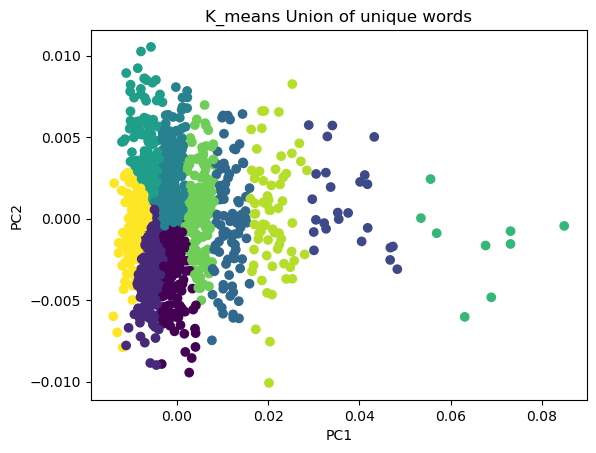

embed: Accenture
carefully: Accenture
increasingly: ASW
operational: ASW
empathy: ASW
user: ASW
merry: ASW
aidata: ASW
reflect: Accenture
season: ASW
swan: Globant
❤_️: ASW
covered1: ASW
🏃: ASW
oxford: ASW
fantastic: ASW
he: ASW
pride_mean: Accenture
intuit: Globant
sleep: Accenture
fully: Accenture
auto: Accenture
favourite: ASW
attract: Globant
someone: Globant
organisation: ASW
computing: ASW
golf: ASW
class: ASW
expectation: Accenture
repetition: Accenture
rodríguez: ASW
mens: Globant
kathy: Globant
broad: ASW
regional: Globant
technique: ASW
gpt: ASW
fundamental: ASW
industry_x: Accenture
👨: ASW
nosso: Globant
marzo: Globant
avoid: ASW
dutta: Globant
qc: ASW
selection: ASW
familiarize: ASW
100: Globant
globants: Globant
object: ASW
coaching: Globant
establishment: ASW
meaningful: Globant
blog: ASW
happiness: Accenture
stakeholder: Accenture
nano: ASW
specify: ASW
player: Globant
🤔: Globant
actionable: Globant
🏿: Globant
️more: ASW
salesforce: Globant
playbook: Accenture
trading: A

In [45]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from collections import defaultdict

ASW_unique = set(ASW_model.wv.index_to_key) - set(Globant_model.wv.index_to_key) - set(Accenture_model.wv.index_to_key)
Globant_unique = set(Globant_model.wv.index_to_key) - set(ASW_model.wv.index_to_key) - set(Accenture_model.wv.index_to_key)
Accenture_unique = set(Accenture_model.wv.index_to_key) - set(ASW_model.wv.index_to_key) - set(Globant_model.wv.index_to_key)

unique_word_vectors = []
for word in ASW_unique:
    unique_word_vectors.append(ASW_model.wv.get_vector(word))
for word in Globant_unique:
    unique_word_vectors.append(Globant_model.wv.get_vector(word))
for word in Accenture_unique:
    unique_word_vectors.append(Accenture_model.wv.get_vector(word))

pca = PCA(n_components=2)
unique_word_vectors_pca = pca.fit_transform(unique_word_vectors)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(unique_word_vectors_pca)

plt.scatter(unique_word_vectors_pca[:, 0], unique_word_vectors_pca[:, 1], c=kmeans.labels_)
plt.title("K_means Union of unique words")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

labels = defaultdict(str)
for i, word in enumerate(ASW_unique):
    labels[word] = "ASW"
for i, word in enumerate(Globant_unique):
    labels[word] = "Globant"
for i, word in enumerate(Accenture_unique):
    labels[word] = "Accenture"

for i, word in enumerate(ASW_unique | Globant_unique | Accenture_unique):
    print(f"{word}: {labels[word]}")

for company, unique_words in [("ASW", ASW_unique), ("Globant", Globant_unique), ("Accenture", Accenture_unique)]:
    company_word_vectors = []
    for word in unique_words:
        company_word_vectors.append(ASW_model.wv.get_vector(word) if company == "ASW" else
                                     Globant_model.wv.get_vector(word) if company == "Globant" else
                                     Accenture_model.wv.get_vector(word))
    
    company_word_vectors_pca = pca.transform(company_word_vectors)
    kmeans_labels = kmeans.predict(company_word_vectors_pca)
    company_cluster_counts = defaultdict(int)
    for i in range(len(unique_words)):
        company_cluster_counts[kmeans_labels[i]] += 1
    company_words_in_clusters = defaultdict(list)
    for i, word in enumerate(unique_words):
        company_words_in_clusters[kmeans_labels[i]].append(word)
    company_most_common_clusters = sorted(company_words_in_clusters.items(), key=lambda x: len(x[1]), reverse=True)
    
    print(f"Most common clusters for {company}:")
    for cluster, words in company_most_common_clusters:
        print(f"Cluster {cluster}: {words}")
